<a href="https://colab.research.google.com/github/abhisheksharma712/employee-turnover-/blob/main/loan_borrower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df=pd.read_csv('/content/loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [41]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [42]:
df=df[['credit.policy', 'purpose','fico','not.fully.paid']]

In [43]:
df

,credit.policy,purpose,fico,not.fully.paid
0,1,debt_consolidation,737,0
1,1,credit_card,707,0
2,1,debt_consolidation,682,0
3,1,debt_consolidation,712,0
4,1,credit_card,667,0
...,...,...,...,...
9573,0,all_other,672,1
9574,0,all_other,722,1
9575,0,debt_consolidation,687,1
9576,0,home_improvement,692,1


In [44]:
df.shape

(9578, 4)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit.policy   9578 non-null   int64 
 1   purpose         9578 non-null   object
 2   fico            9578 non-null   int64 
 3   not.fully.paid  9578 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 299.4+ KB


In [46]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [47]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

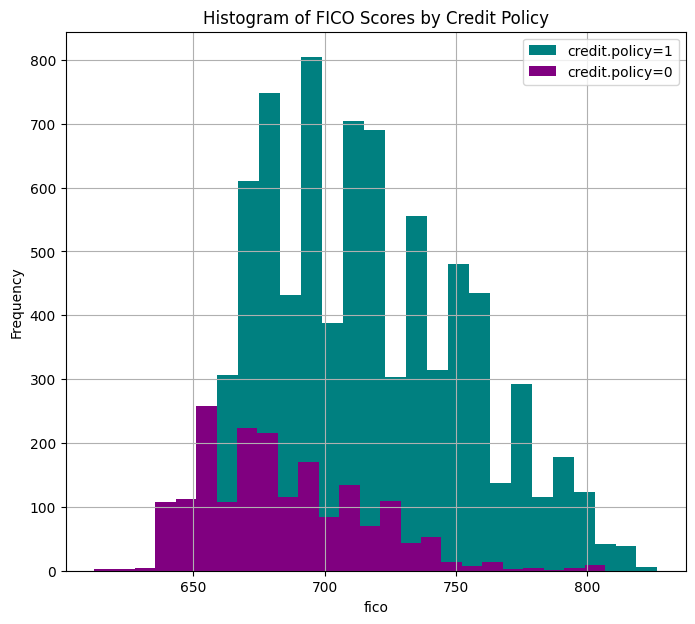

In [48]:
plt.figure(figsize=(8, 7))  # Use figsize instead of figure
df[df['credit.policy'] == 1]['fico'].hist(color='Teal', bins=25, label='credit.policy=1')
df[df['credit.policy'] == 0]['fico'].hist(color='purple', bins=25, label='credit.policy=0')
plt.legend()
plt.xlabel('fico')
plt.ylabel('Frequency')
plt.title('Histogram of FICO Scores by Credit Policy')
plt.show()


In [49]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

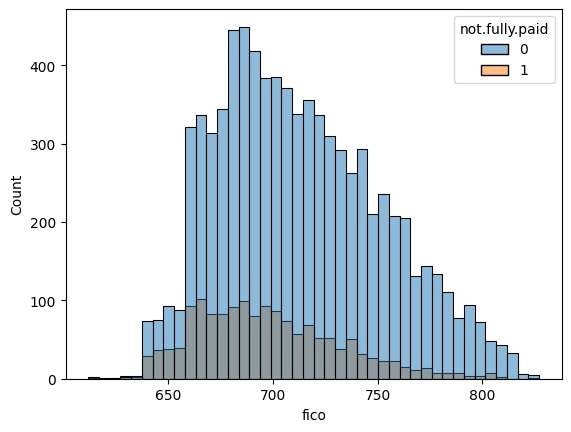

In [50]:
sns.histplot(data=df,x='fico',hue='not.fully.paid')
plt.xlabel('fico')
plt.show()

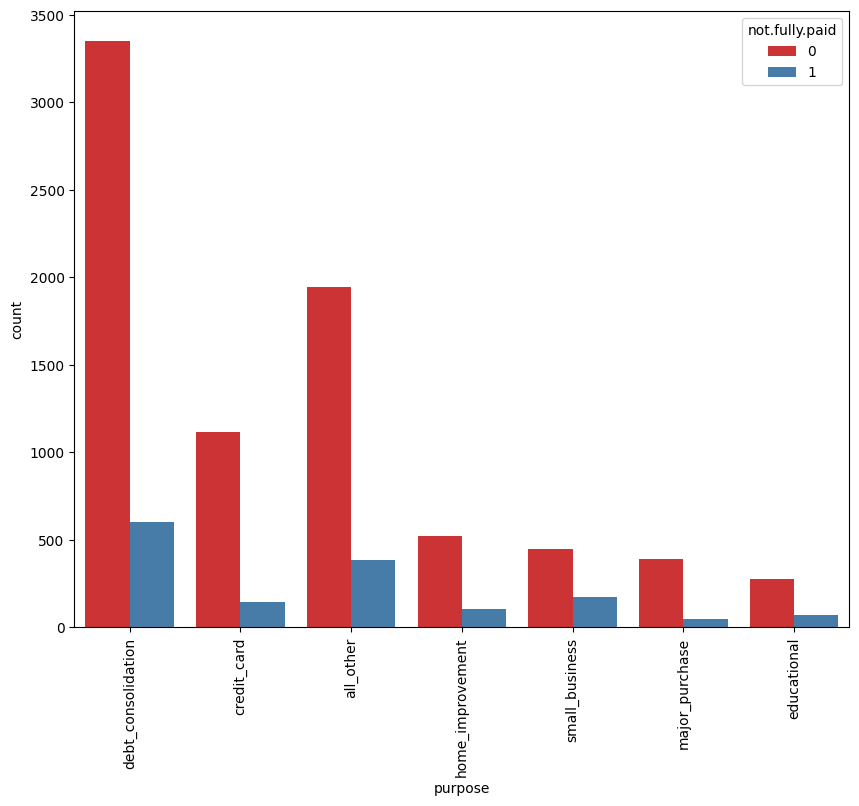

In [51]:
# bivariate analysis - 'purpose' vs 'not.fully.paid'
plt.figure(figsize=(10, 8))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [52]:
cat_var=df['purpose']
cat_var

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [57]:
df1 = pd.get_dummies(df, columns=['purpose'], drop_first=True,dtype=int)
df1.head()

,credit.policy,fico,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,737,0,0,1,0,0,0,0
1,1,707,0,1,0,0,0,0,0
2,1,682,0,0,1,0,0,0,0
3,1,712,0,0,1,0,0,0,0
4,1,667,0,1,0,0,0,0,0


In [59]:
# Drop the target variable 'not.fully.paid' from X
X = df1.drop('not.fully.paid', axis=1)

# Assign the target variable 'not.fully.paid' to y
y = df1['not.fully.paid']


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
pred=dtree.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.8313152400835073

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred=rfc.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred)
accuracy_rf

0.8313152400835073

In [70]:
rfc.feature_importances_

array([0.1529053 , 0.71491175, 0.01937513, 0.01662639, 0.01671169,
       0.01671405, 0.0150536 , 0.0477021 ])

In [71]:
X.columns

Index(['credit.policy', 'fico', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

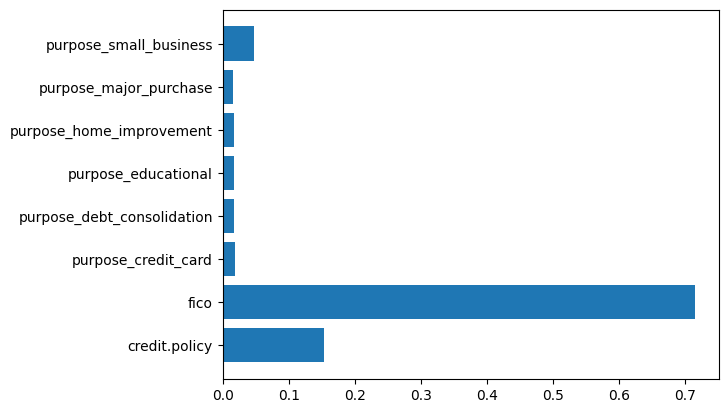

In [72]:
plt.barh(X.columns,rfc.feature_importances_)
plt.show()

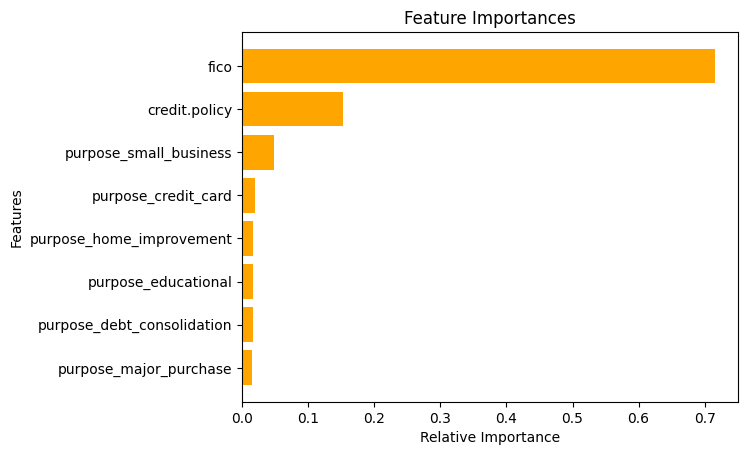

In [74]:
import matplotlib.pyplot as plt

# Get the indices that would sort the feature importances
sorted_index = rfc.feature_importances_.argsort()

# Plot the feature importances
plt.barh(X.columns[sorted_index], rfc.feature_importances_[sorted_index], color='orange', align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
